<a href="https://colab.research.google.com/github/sofianna-e/DeliveriesEKPA/blob/main/Anomaly_Detection_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#εγκατάσταση πακέτου PyOD (https://pyod.readthedocs.io/en/latest/)
!pip install pyod

In [27]:
#εισαγωγή βιβλιοθηκών - πακέτων
import pandas as pd
from sklearn.preprocessing import StandardScaler
from pyod.models.ecod import ECOD
import matplotlib.pyplot as plt


In [28]:
#εισαγωγή του συνόλου δεδομένων
network_data = pd.read_csv('https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/network_traffic_data.csv', delimiter=',')

In [29]:
# δημιουργία συνόλου δεδομένων
X_train, X_test, y_train, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)


In [30]:
# εκπαίδευση του αλγορίθμου ECOD
clf_name = 'ECOD'
clf = ECOD()
clf.fit(X_train)
y_train_scores = clf.decision_scores_  # Outlier scores for training data
y_test_scores = clf.decision_function(X_test)  # Outlier scores for test data


In [31]:
# προβλέψεις και υπολογισμός βαθμολογιών ανωμαλιών
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores



In [32]:
# πρόβλεψη για τα δεδομένα δοκιμής
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores



In [33]:
# αξιολόγηση και εκτύπωση αποτελεσμάτων
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)




On Training Data:
ECOD ROC:0.9562, precision @ rank n:0.65

On Test Data:
ECOD ROC:0.935, precision @ rank n:0.4


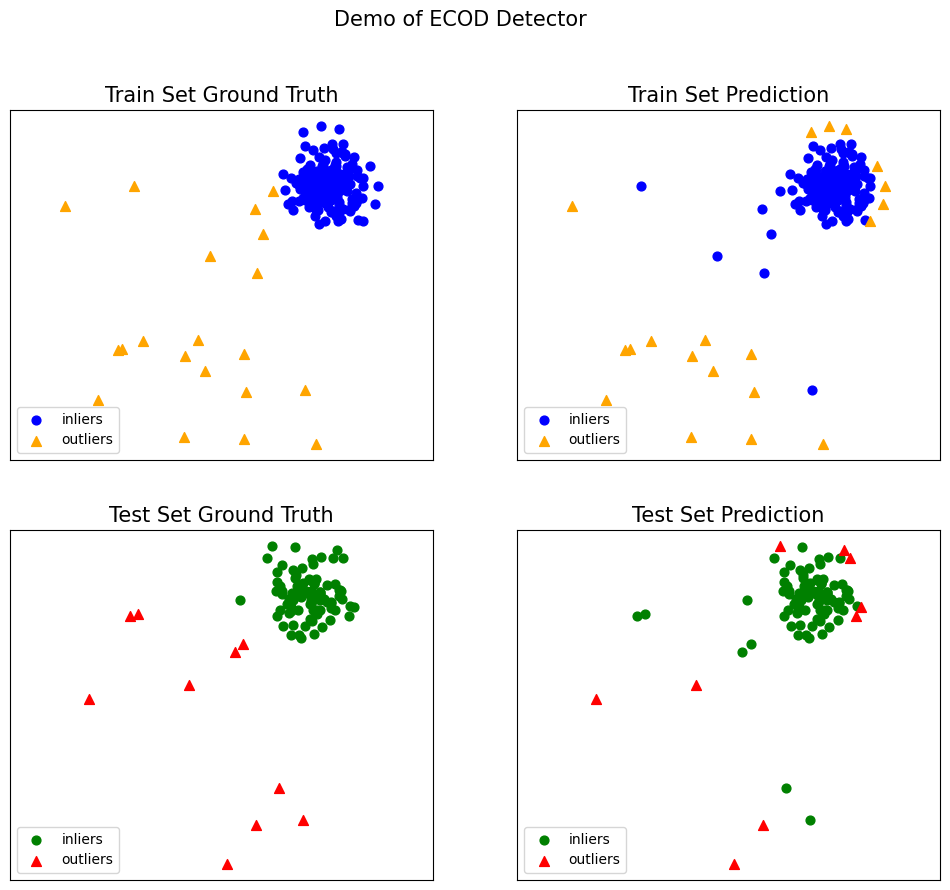

In [34]:
# οπτικοποίηση αποτελεσμάτων
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=False)